In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import seaborn as sns


In [4]:
data=pd.read_csv('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data.shape


(1407328, 6)

In [6]:
data.info

<bound method DataFrame.info of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  

In [7]:
# Calculate the length of each headline
data['headline_length'] = data['headline'].apply(len)

# Obtain basic statistics for headline lengths
headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [8]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [9]:
# Convert the 'date' column to datetime, allowing pandas to infer the format
# errors='coerce' will convert any non-convertible values to NaT (Not a Time) rather than raising an error.

data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Count the number of articles per day
daily_counts = data['date'].dt.date.value_counts().sort_index()
print(daily_counts)


date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [10]:
# Function to get the sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity



In [11]:
# Apply the sentiment analysis
data['sentiment'] = data['headline'].apply(get_sentiment)



In [12]:
# Classify the sentiment as positive, negative, or neutral
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display sentiment analysis results
print(data[['headline', 'sentiment', 'sentiment_label']])

                                                  headline  sentiment  \
0                  Stocks That Hit 52-Week Highs On Friday       0.00   
1               Stocks That Hit 52-Week Highs On Wednesday       0.00   
2                            71 Biggest Movers From Friday       0.00   
3             46 Stocks Moving In Friday's Mid-Day Session       0.00   
4        B of A Securities Maintains Neutral on Agilent...       0.00   
...                                                    ...        ...   
1407323             Top Narrow Based Indexes For August 29       0.15   
1407324  Recap: Wednesday's Top Percentage Gainers and ...       0.15   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...       0.00   
1407326  Oppenheimer Initiates China Zenix At Outperfor...       0.00   
1407327  China Zenix Auto International Opens For Tradi...       0.00   

        sentiment_label  
0               neutral  
1               neutral  
2               neutral  
3               neu

In [20]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(data[['date', 'headline', 'sentiment_label']].head())



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...


                       date  \
0 2020-06-05 10:30:54-04:00   
1 2020-06-03 10:45:20-04:00   
2 2020-05-26 04:30:07-04:00   
3 2020-05-22 12:45:06-04:00   
4 2020-05-22 11:38:59-04:00   

                                            headline sentiment_label  
0            Stocks That Hit 52-Week Highs On Friday         Neutral  
1         Stocks That Hit 52-Week Highs On Wednesday         Neutral  
2                      71 Biggest Movers From Friday         Neutral  
3       46 Stocks Moving In Friday's Mid-Day Session         Neutral  
4  B of A Securities Maintains Neutral on Agilent...        Positive  


In [39]:
import nltk

# Re-download the necessary resources
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenization and stopword removal
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lower case and tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to the headlines
data['tokens'] = data['headline'].apply(preprocess)


In [41]:
# Flatten the list of tokens and count the frequency
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Print the most common keywords
common_words = word_freq.most_common(20)
print("Most common keywords or phrases:")
for word, freq in common_words:
    print(f"{word}: {freq} times")



Most common keywords or phrases:
stocks: 161702 times
vs: 138835 times
eps: 128801 times
est: 122289 times
shares: 114140 times
reports: 108688 times
update: 91645 times
market: 91080 times
earnings: 87183 times
sales: 79528 times
top: 78493 times
benzinga: 74466 times
pt: 73059 times
announces: 66531 times
price: 64217 times
buy: 63928 times
downgrades: 61942 times
trading: 61146 times
raises: 57793 times
upgrades: 56802 times


Time Series Analysis:

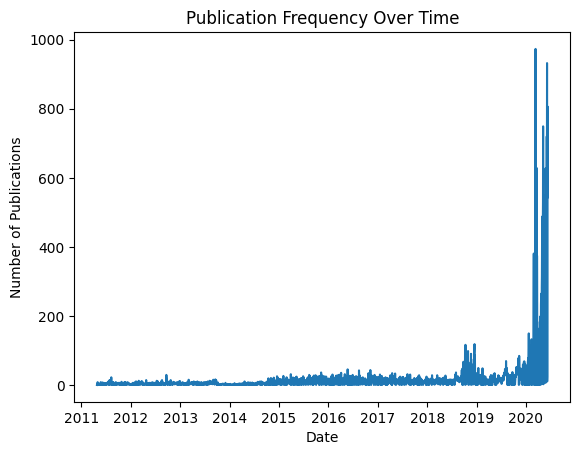

In [50]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['weekday'] = data['date'].dt.weekday  # Monday=0, Sunday=6

# Group by date to count publications per day
daily_counts = data.groupby(data['date'].dt.date).size()

# Plot the publication frequency over time
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()


Publisher Analysis:


In [51]:
# Step 1: Count Contributions by Publisher
publisher_counts = data['publisher'].value_counts()
print("Top Publishers by Number of Contributions:")
print(publisher_counts.head(10))  # Display top 10 publishers

Top Publishers by Number of Contributions:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [52]:
# Step 2: Analyze Types of News (based on headline keywords or stock symbols)
# For simplicity, we'll look at the unique stock symbols reported by each publisher
publisher_stock_analysis = data.groupby('publisher')['stock'].nunique()
print("\nNumber of Unique Stocks Reported by Each Publisher:")
print(publisher_stock_analysis.head(10))  # Display top 10 publishers by unique stock reports



Number of Unique Stocks Reported by Each Publisher:
publisher
47ertrends              9
AARP                    7
ABNNewswire            10
Aakin                   5
Aaron Jackson.Ed       16
Aaron Levitt          238
Abe Raymond           818
Abhi Rao              108
Abigail Field          17
Above Average Odds     17
Name: stock, dtype: int64


In [54]:
# Step 3: Email Domain Analysis (if applicable)
# Extract domains if publisher names contain email addresses
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)
domain_counts = data['domain'].value_counts(dropna=True)
print("\nTop Domains by Number of Contributions:")
print(domain_counts.head(10))  # Display top 10 domains



Top Domains by Number of Contributions:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


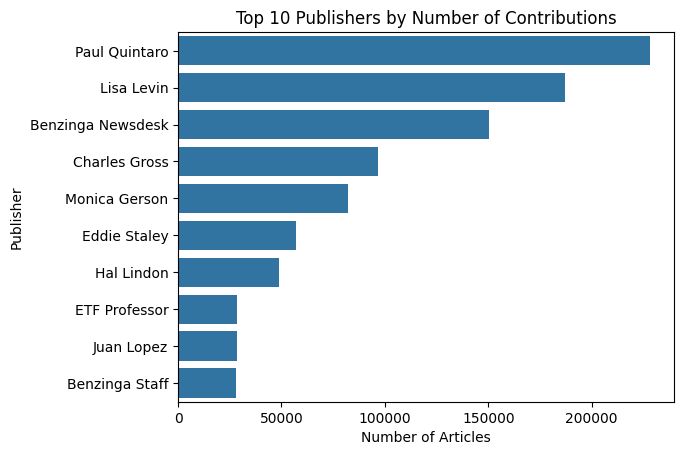

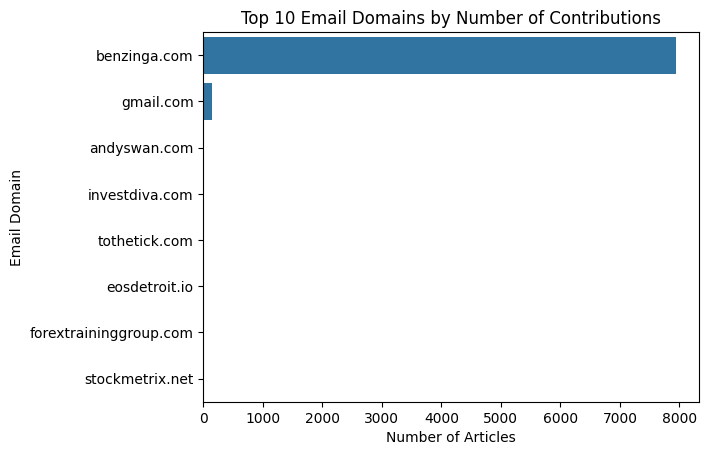

In [55]:
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Publishers by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index)
plt.title('Top 10 Email Domains by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Email Domain')
plt.show()